## The matrix

$$A = \begin{bmatrix}
a_{11} & a_{12} & a_{13} & \cdots & a_{1N}\\
a_{21} & a_{22} & a_{23} & \cdots & a_{2N}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
a_{M1} & a_{M2} & a_{M3} & \cdots & a_{MN}\\
\end{bmatrix}$$

## The vector

$$V = \begin{bmatrix}
v_{11} &
v_{12} &
v_{13} &
\cdots &
v_{1M}
\end{bmatrix}$$

In [1]:
import numpy as np

In [2]:
np.random.seed(7)
M = 2
N = 2

A = np.random.randn(M, N)
V = np.random.randn(1, M)

In [3]:
V.shape, A.shape 

((1, 2), (2, 2))

## The Matrix Multiplication

In [4]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [5]:
res = V @  A

In [6]:
res.shape

(1, 2)

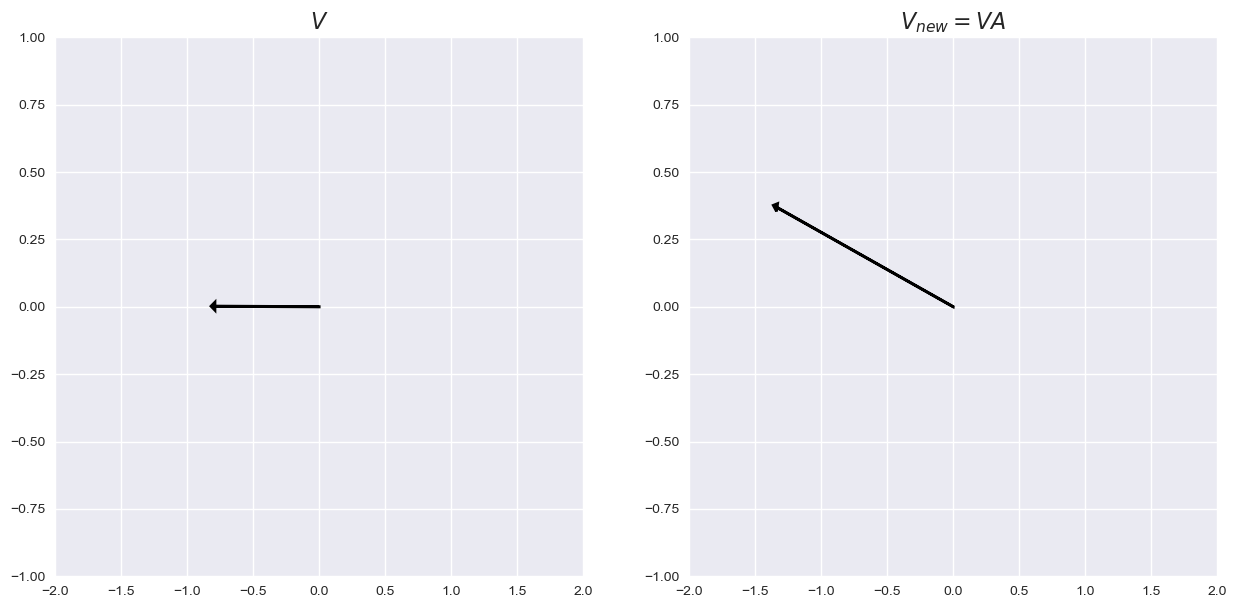

In [7]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.arrow(0, 0, V[0][0], V[0][1], head_width=0.03, head_length=0.03, linewidth=2,  fc='k', ec='k')
plt.xlim(-2, 2)
plt.ylim(-1, 1)
plt.title('$V$', fontsize=16)

plt.subplot(1, 2, 2)
plt.arrow(0, 0, res[0][0], res[0][1], head_width=0.03, head_length=0.03, linewidth=2,  fc='k', ec='k')
plt.xlim(-2, 2)
plt.ylim(-1, 1)
plt.title('$V_{new} = VA$', fontsize=16)

plt.savefig('transformed_vec.png');

## Data vector

In [8]:
import pandas as pd
import seaborn as sns

In [9]:
# Load the iris data
iris = sns.load_dataset("iris")

In [10]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


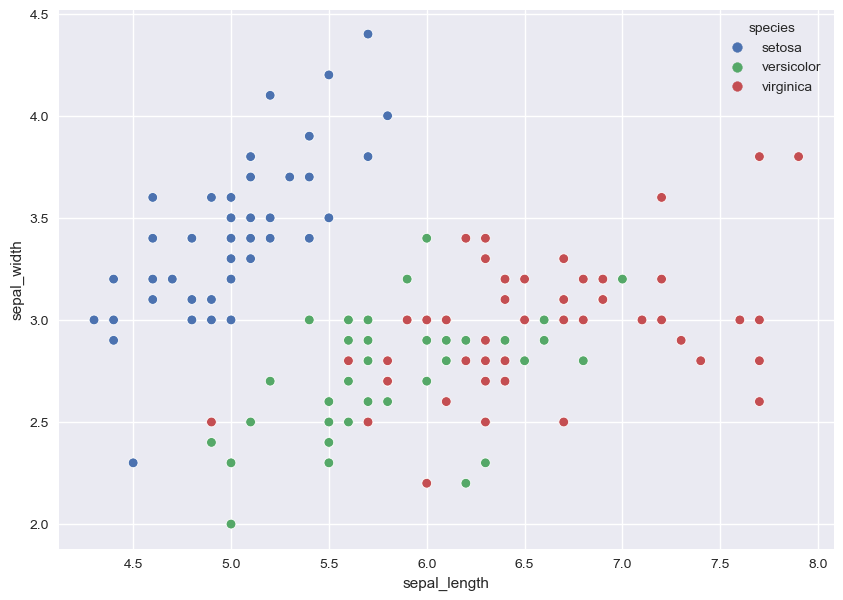

In [11]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species')
plt.savefig('plot_iris.png');

Transform data into the matrices and vectors

In [12]:
X = iris.drop('species', axis=1)
y = iris['species']
encoded_y = pd.get_dummies(iris['species']) # Represent y with one-hot-encoder

In [13]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
y.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [15]:
encoded_y.head()

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [16]:
X, y, encoded_y = X.to_numpy(), y.to_numpy(), encoded_y.to_numpy()

In [17]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [18]:
y[:5]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

In [19]:
encoded_y[:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [20]:
np.random.seed(42)
M_input = np.random.uniform(-1, 1, (4, 16))
X_hidden= X @ M_input

In [21]:
X_hidden.shape

(150, 16)

In [22]:
A

array([[ 1.6905257 , -0.46593737],
       [ 0.03282016,  0.40751628]])

In [23]:
iris_hidden = pd.DataFrame(X_hidden)
iris_hidden['species'] = iris['species']

iris_hidden.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,species
0,-3.849167,5.901402,3.381557,0.518486,-3.096921,-7.000986,-5.407522,2.800706,-0.499033,3.983461,-8.477943,5.968951,3.317872,-5.745386,-2.888285,-5.536713,setosa
1,-3.603225,5.696360,3.356814,0.687794,-3.071182,-6.502878,-5.022900,2.787874,-0.495549,3.615056,-7.985850,5.766752,3.092480,-5.176772,-2.868560,-5.080599,setosa
2,-3.544354,5.436200,3.143668,0.503142,-2.849771,-6.429012,-4.966122,2.599918,-0.477975,3.646861,-7.821092,5.502618,3.044713,-5.275632,-2.660614,-5.089765,setosa
3,-3.654090,5.520660,3.297133,0.648524,-2.881500,-6.449041,-4.762475,2.529471,-0.640596,3.546283,-7.851389,5.569517,2.863253,-5.062381,-2.693804,-4.952524,setosa
4,-3.863226,5.816211,3.321547,0.457000,-3.005755,-7.004286,-5.360710,2.700743,-0.528042,3.998881,-8.442125,5.877816,3.269866,-5.778564,-2.803141,-5.539289,setosa


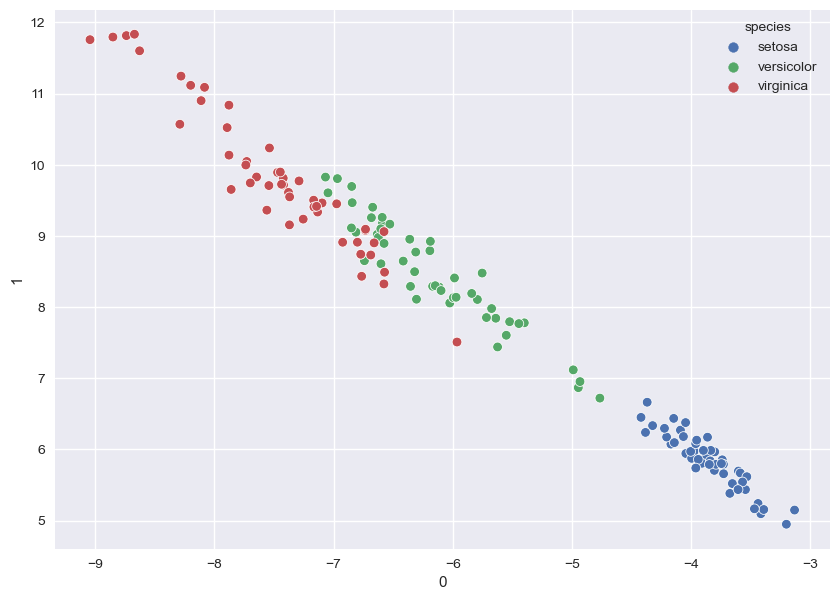

In [24]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=iris_hidden, x=0, y=1, hue='species')
plt.savefig('plot_iris_hidden.png');

In [25]:
X_acctivate = np.maximum(0, X_hidden)

iris_activate = pd.DataFrame(X_acctivate)
iris_activate['species'] = iris['species']
iris_activate.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,species
0,0.0,5.901402,3.381557,0.518486,0.0,0.0,0.0,2.800706,0.0,3.983461,0.0,5.968951,3.317872,0.0,0.0,0.0,setosa
1,0.0,5.696360,3.356814,0.687794,0.0,0.0,0.0,2.787874,0.0,3.615056,0.0,5.766752,3.092480,0.0,0.0,0.0,setosa
2,0.0,5.436200,3.143668,0.503142,0.0,0.0,0.0,2.599918,0.0,3.646861,0.0,5.502618,3.044713,0.0,0.0,0.0,setosa
3,0.0,5.520660,3.297133,0.648524,0.0,0.0,0.0,2.529471,0.0,3.546283,0.0,5.569517,2.863253,0.0,0.0,0.0,setosa
4,0.0,5.816211,3.321547,0.457000,0.0,0.0,0.0,2.700743,0.0,3.998881,0.0,5.877816,3.269866,0.0,0.0,0.0,setosa


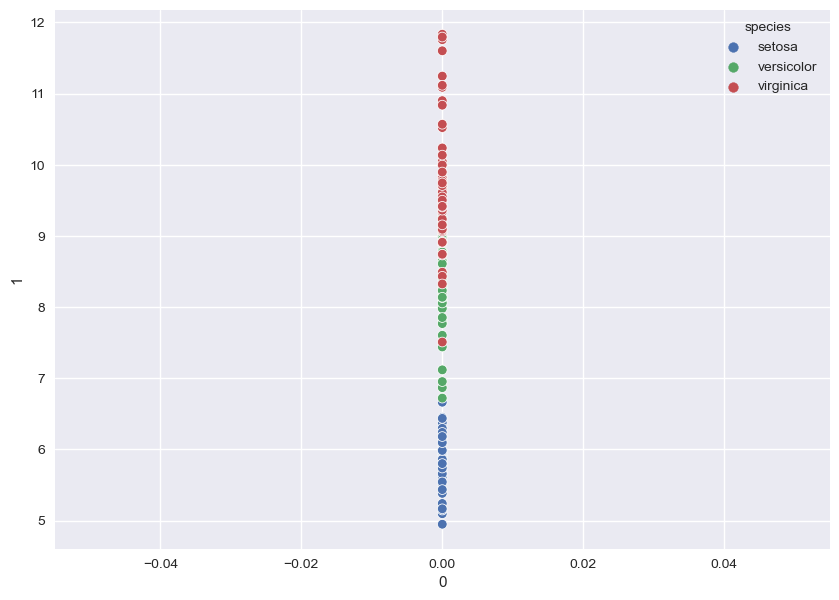

In [26]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=iris_activate, x=0, y=1, hue='species')
plt.savefig('plot_iris_activate.png');

In [27]:
encoded_iris = pd.DataFrame(encoded_y, columns=iris['species'].unique())
encoded_iris.head()

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [28]:
np.random.seed(42)
M_output = np.random.uniform(-1, 1, (16, 3))
X_out = X_acctivate @ M_output

iris_out = pd.DataFrame(X_out, columns=iris['species'].unique())
iris_out.head()

,setosa,versicolor,virginica
0,0.547761,0.380306,-2.346909
1,0.504941,0.271215,-1.921878
2,0.483109,0.347619,-2.118660
3,0.603535,0.481516,-1.924637
4,0.567857,0.452084,-2.419389


In [29]:
normalized_X_out = np.exp(X_out) / np.sum(np.exp(X_out), axis=1).reshape(X_out.shape[0], -1)

normalized_iris_out = pd.DataFrame(normalized_X_out, columns=iris['species'].unique())
normalized_iris_out.head()

,setosa,versicolor,virginica
0,0.526002,0.444901,0.029097
1,0.531944,0.421076,0.046980
2,0.513497,0.448431,0.038072
3,0.508922,0.450463,0.040614
4,0.515171,0.458851,0.025978


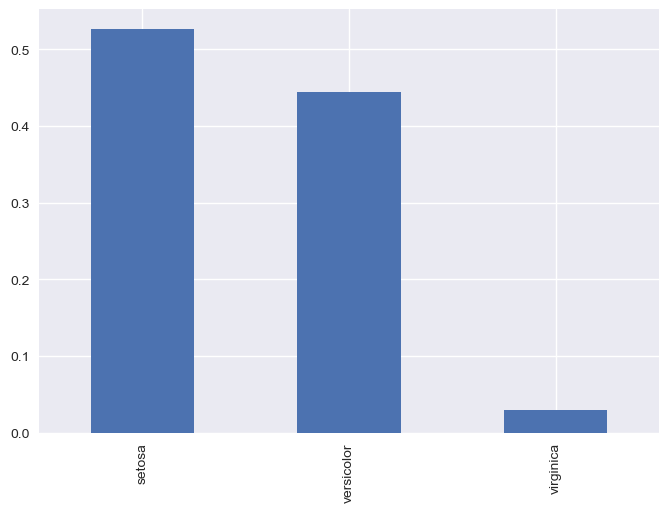

In [30]:
normalized_iris_out.loc[0, :].plot(kind='bar')
plt.savefig('bar_label.png')

In [31]:
# X = torch.from_numpy(X).type(torch.float)
# y = torch.from_numpy(y).type(torch.float)
# encoded_y = torch.from_numpy(encoded_y).type(torch.float)